# Customer Segmentation and Analysis

**Steps to solve the problem:**

- Importing Libraries.
- Exploration of Data.
- Data Visualization.
- Clustering using K-Means.
- Selection of Clusters.
- Plotting the Cluster Boundary and Clusters.
- 3D Plot ofClusters.


#### Importing Libraries.

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

#### Data exploration

In [15]:
df = pd.read_csv(r'C:\Users\jagua\Downloads\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.shape

(200, 5)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    object
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [49]:
df.drop(columns=['CustomerID']).describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [51]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Data visualization

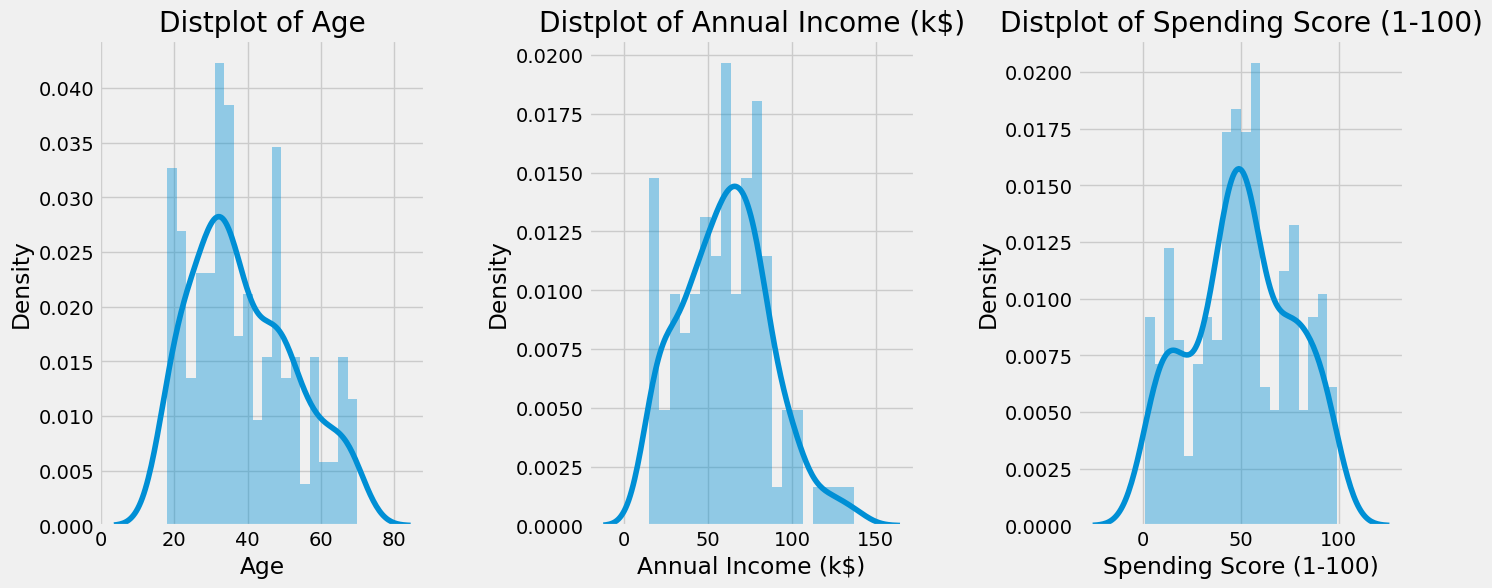

In [56]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

#### Count Plot of Gender

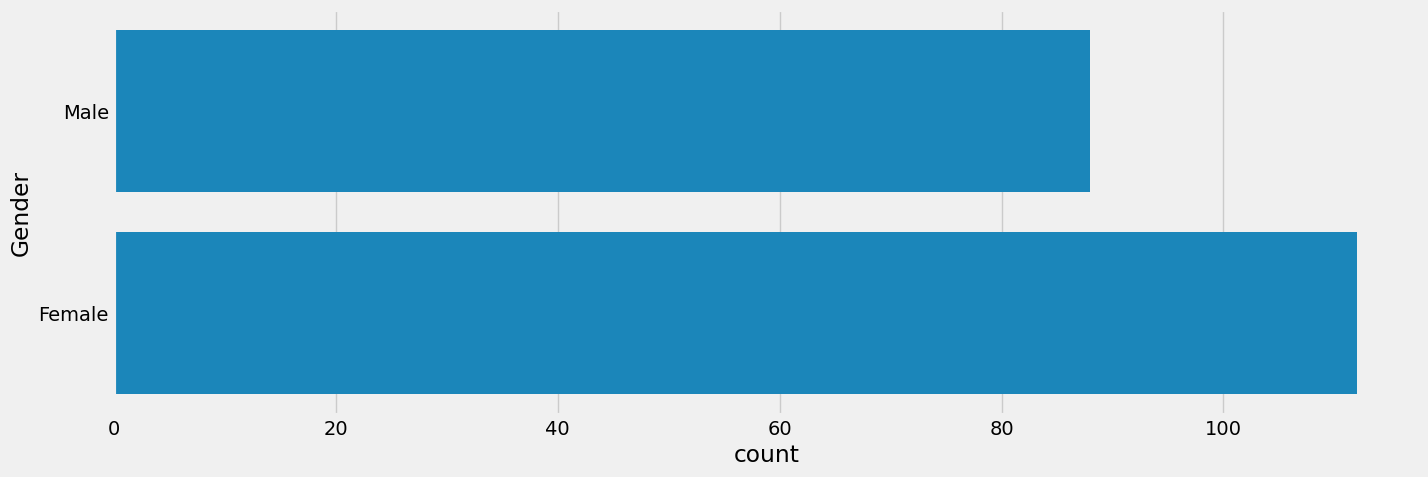

In [63]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

#### Ploting the Relation between Age , Annual Income and Spending Score

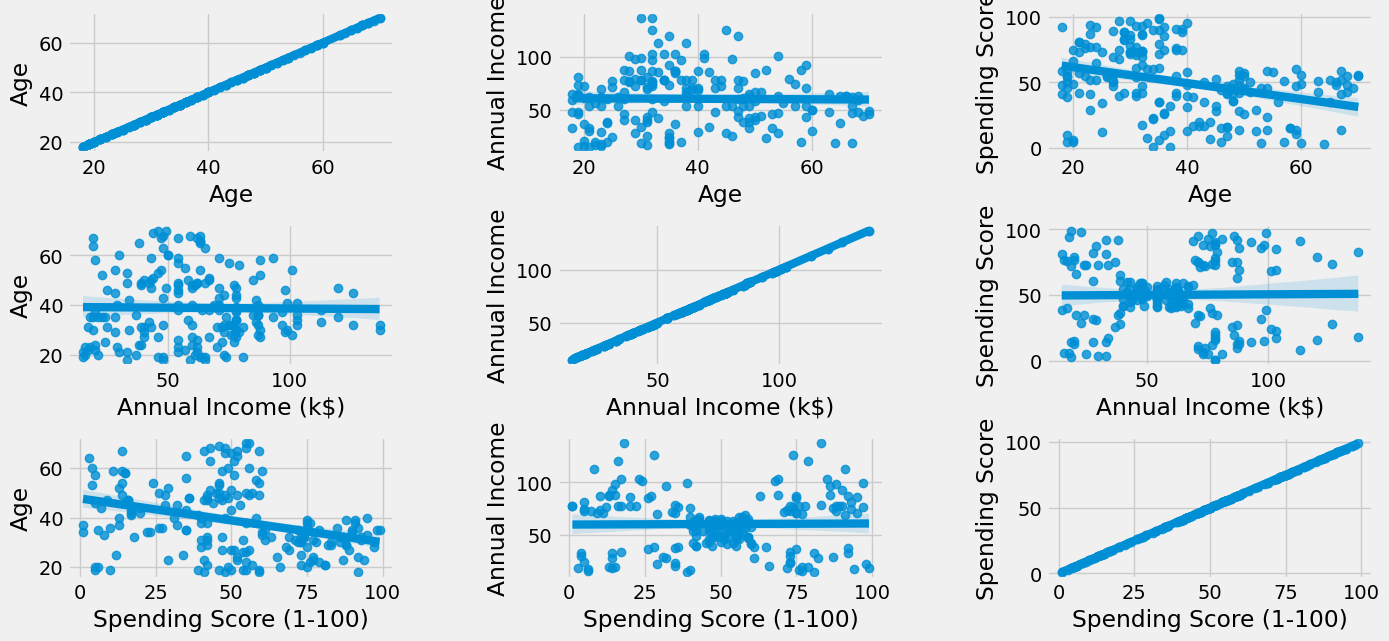

In [67]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

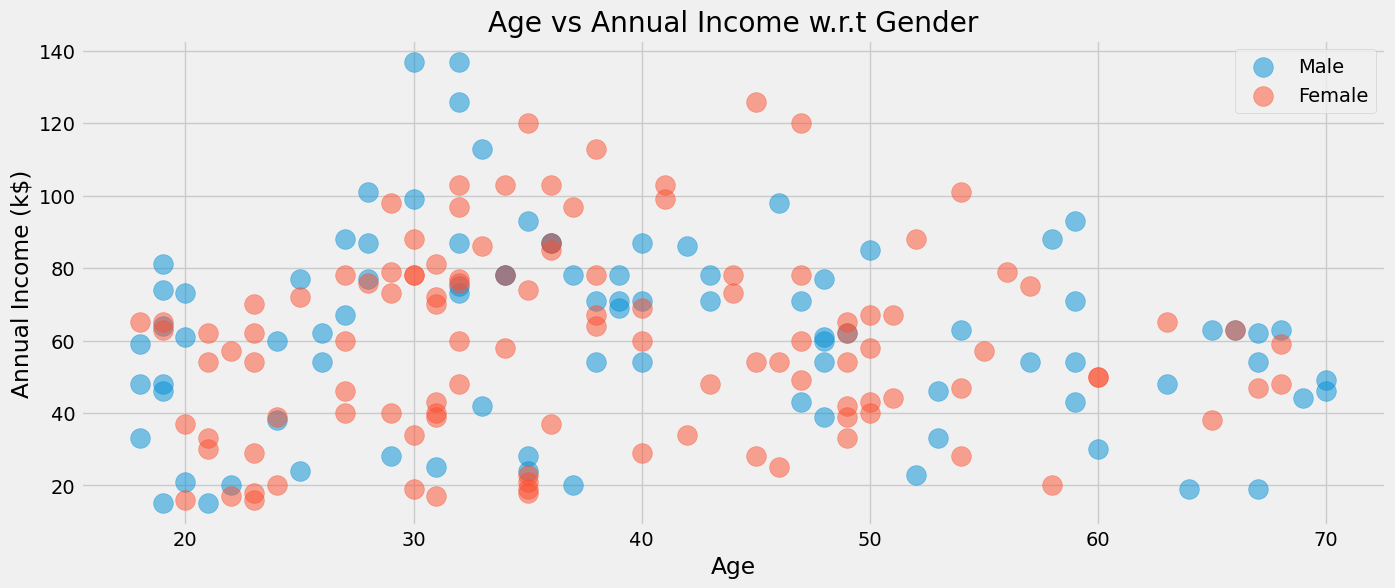

In [73]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

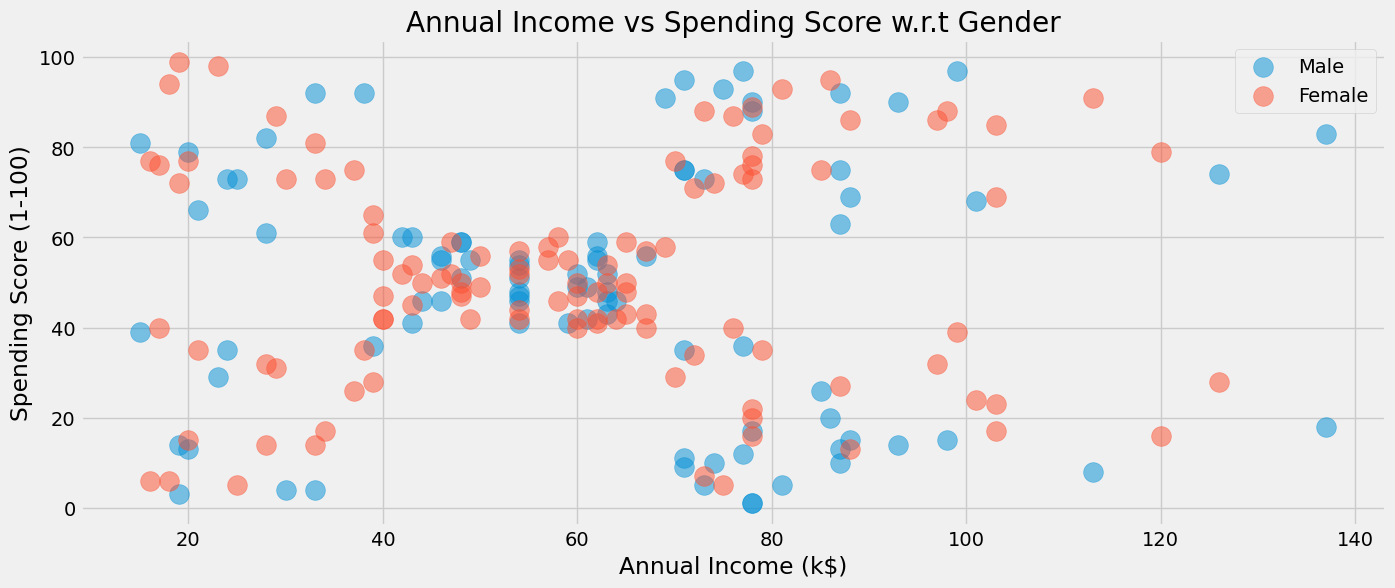

In [75]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

#### Distribution of values in Age , Annual Income and Spending Score according to Gender

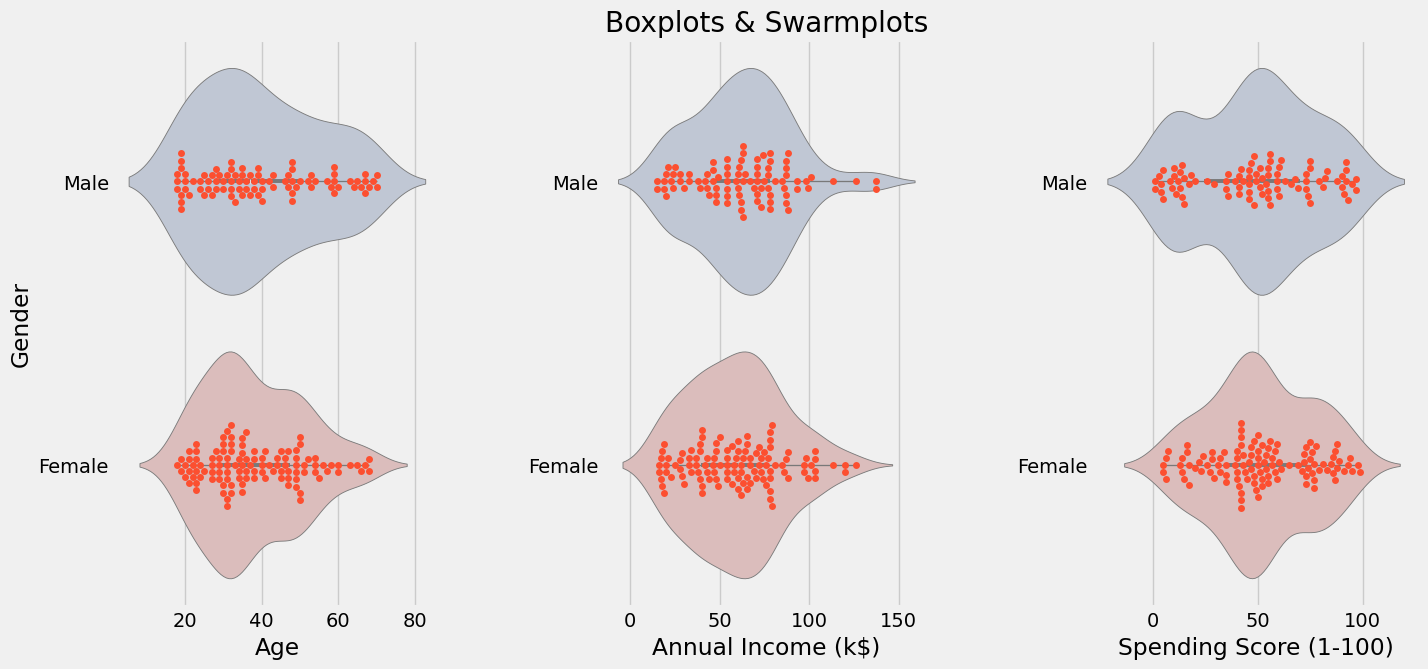

In [78]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering using K- means


#### 1. Segmentation using Age and Spending Score


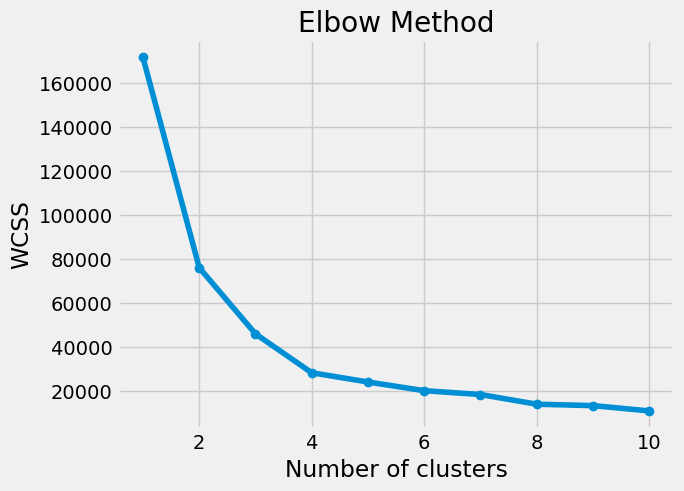

In [96]:
X = df[['Age', 'Spending Score (1-100)']]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia = how "tight" clusters are

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.show()

**Elbow shows K=4.**

Applying K-Means for K=4

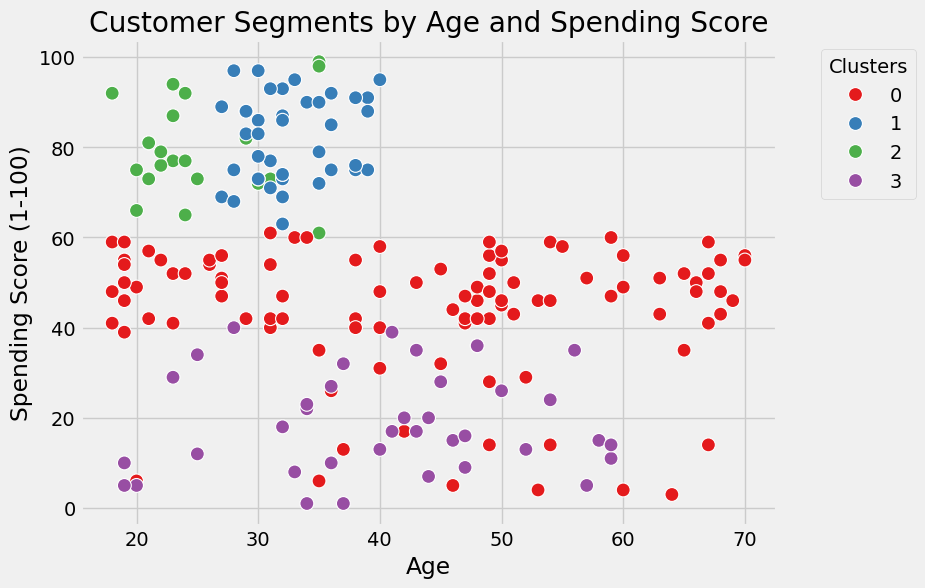

In [102]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_Age_Spend'] = kmeans.fit_predict(X)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster_Age_Spend', data=df, palette='Set1', s=100)
plt.title('Customer Segments by Age and Spending Score')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2. Segmentation using Annual Income and Spending Score



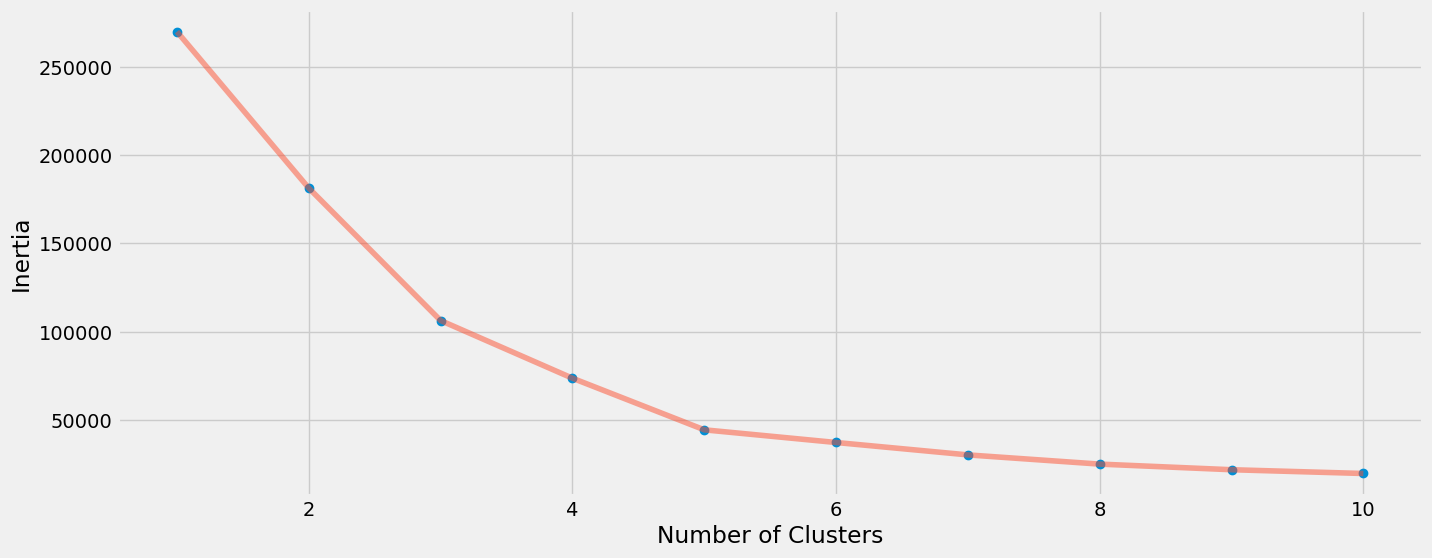

In [128]:
X = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

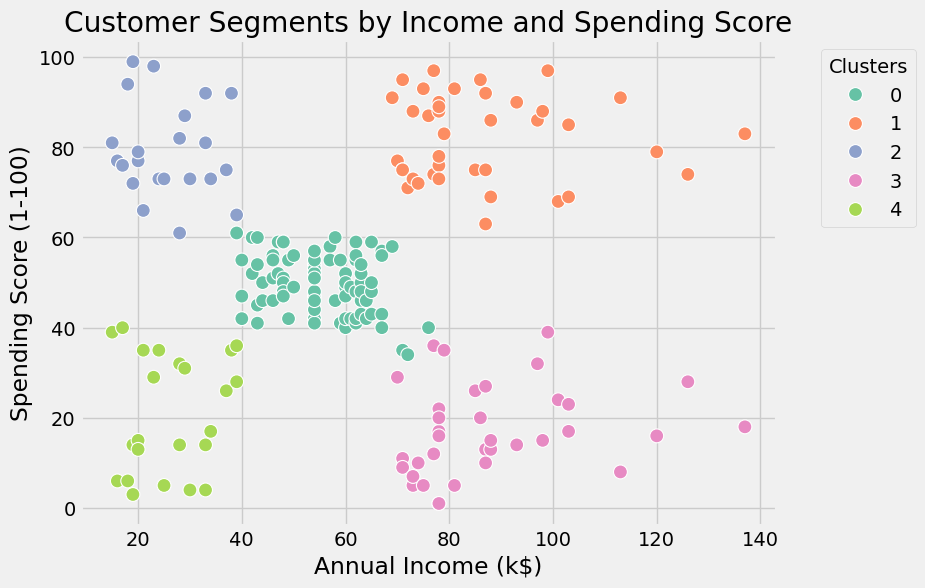

In [134]:
kmeans = KMeans(n_clusters=5, random_state=42)  #elbow shows 5 here
df['Cluster_Income_Spend'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Income_Spend', data=df, palette='Set2', s=100)
plt.title('Customer Segments by Income and Spending Score')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 3. Segmentation using Age , Annual Income and Spending Score


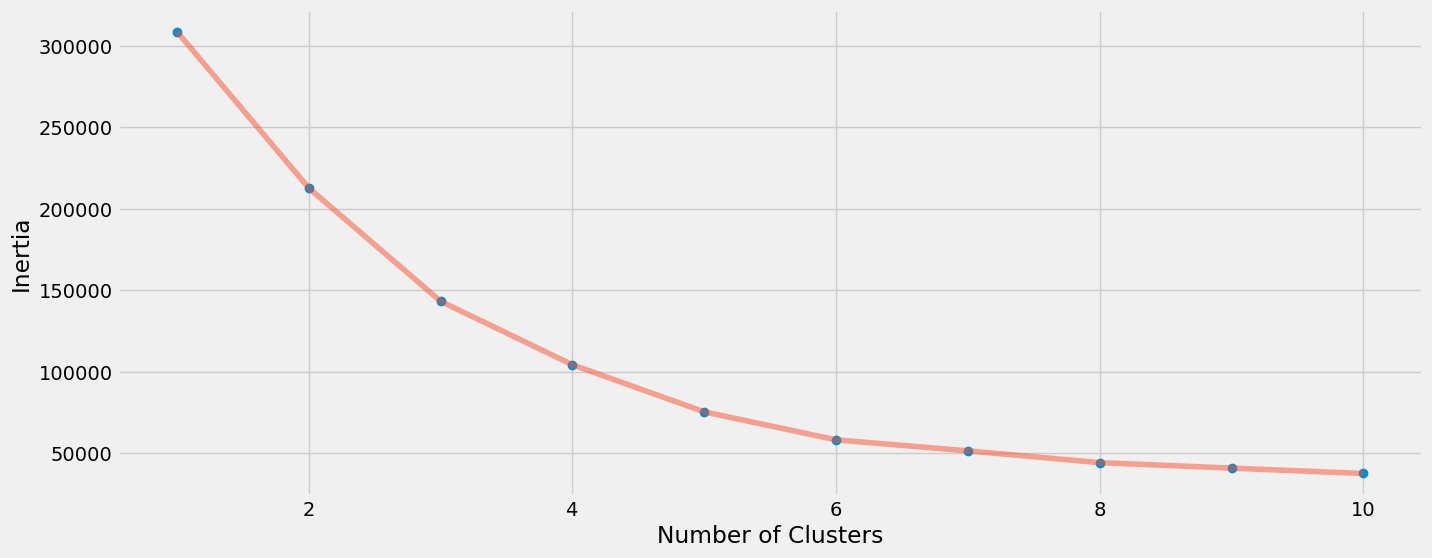

In [136]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

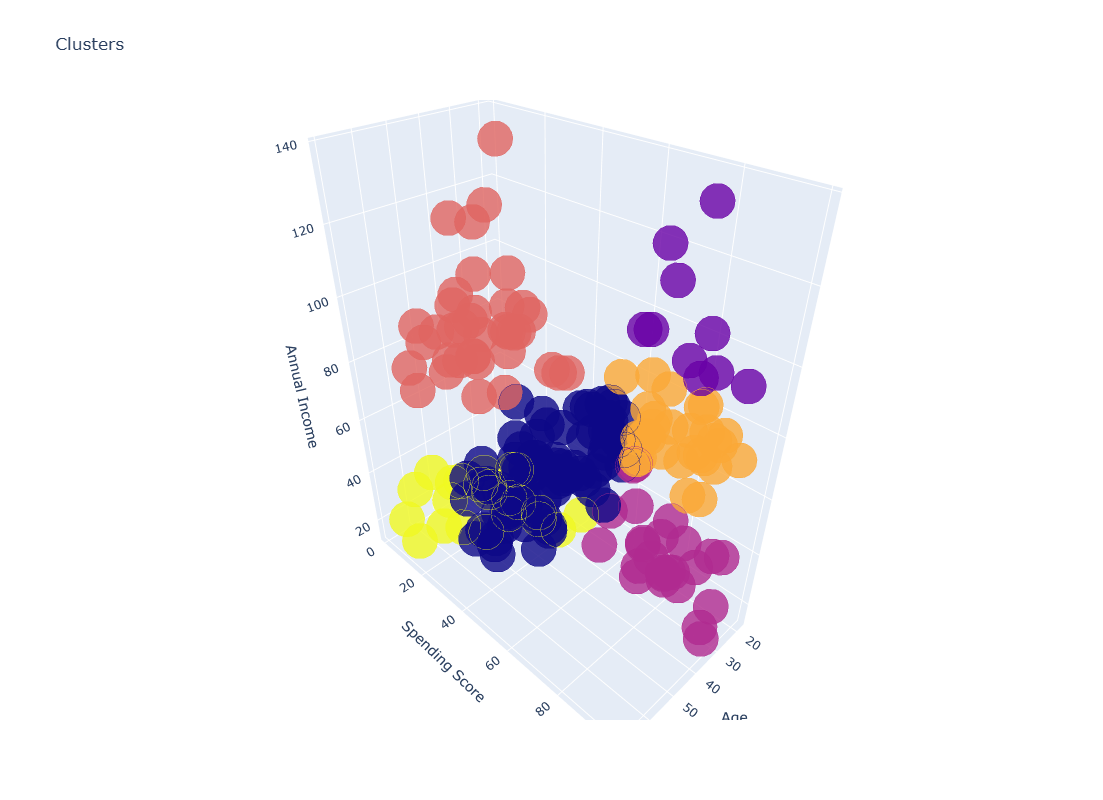

In [148]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly.offline as py

# Assuming 'df' is already a pandas DataFrame
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster_Age_Income_Spend'] = kmeans.fit_predict(X)

# Get the cluster labels and add them to the DataFrame
labels3 = kmeans.labels_
df['label3'] = labels3

# Create a 3D scatter plot
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color = df['label3'],
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
    )
)

# Define the layout of the plot
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title='Age'),
        yaxis = dict(title='Spending Score'),
        zaxis = dict(title='Annual Income')
    ),
    height=800,  # Increase the height of the plot
    width=1000   # Increase the width of the plot
)

# Create the figure and plot it
fig = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig)

### Cluster Analysis Conclusions  

Based on the customer segmentation, the following insights can be drawn:  

1. **Young Professionals (Cluster 1: Ages 18–30, High Income, Low Spending)**  
   - Likely financially stable but cautious spenders.  
   - Potential target for savings plans, investment products, or value-based marketing.  



2. **Middle-Aged Balancers (Cluster 2: Ages 30–45, Moderate Income & Spending)**  
   - Steady income with balanced spending habits.  
   - Best engaged with loyalty programs, bundled offers, and mid-range premium products.  



3. **Older Spenders (Cluster 3: Ages 50–65, Low Income, High Spending)**  
   - Possibly retirees spending on healthcare, travel, or luxury.  
   - Targeted promotions in healthcare, leisure, or installment-based luxury purchases may work well.  



4. **Affluent Big Spenders (Cluster 4: Ages 30–50, High Income, High Spending)**  
   - Ideal for premium/luxury brands and exclusive memberships.  
   - High potential for upselling, personalized services, and VIP rewards.  



5. **Budget-Conscious Youth (Cluster 5: Ages 18–35, Low Income, Low Spending)**  
   - Likely students or early-career individuals with limited disposable income.  
   - Discounts, student deals, and affordable payment plans would be effective.  



6. **Wealthy High Discretionary Spenders (Cluster 6: Broad Age Range, High Income & Spending)**  
   - Affluent customers with high purchasing power across categories.  
   - Luxury experiences, concierge services, and high-end cross-selling opportunities are key.  



**Strategic Recommendation:**  
Tailor marketing campaigns, product recommendations, and loyalty incentives based on these distinct behavioral and demographic profiles.  